# 1. Importing Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder , MinMaxScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

# 2. Loading The Dataset

### Notice that we've changed the order of the data

In [3]:
dataR = pd.read_csv("/kaggle/input/ann-car-sales-price-prediction/car_purchasing.csv",encoding='ISO-8859-1')
dataR = dataR.sample(n = len(dataR), random_state = 250)
dataR.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
418,Josiah,Phasellus@Aliquamadipiscing.co.uk,Bolivia,1,29.599080,70076.22764,1726.809885,552267.6361,38174.87433
263,Yardley W. Jacobson,enim.non.nisi@Ut.net,Saint Pierre and Miquelon,1,54.491876,47684.46306,10128.761140,613372.8917,48300.02057
324,"Thompson, Alvin R.",interdum.ligula@Phasellus.edu,Iraq,0,36.375098,67032.16445,7666.530300,516738.1724,41137.89459
94,Martina Fuentes,elit@nequeIn.com,Senegal,1,53.229849,70896.72853,11794.739140,398746.8458,54075.12064
222,Keegan Q. Ramirez,aliquet@volutpatNulla.edu,Yemen,0,47.450949,61063.35631,12066.265710,509543.0859,46892.26617


### Getting the dataset info is a good practice !

In [4]:
dataR.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 418 to 366
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 39.1+ KB


# 3. Data Preprocessing

### Drop what u won't need

In [6]:
dataR.drop(columns = ['customer name', 'customer e-mail', 'country'], inplace = True)
dataR.head()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
418,1,29.599080,70076.22764,1726.809885,552267.6361,38174.87433
263,1,54.491876,47684.46306,10128.761140,613372.8917,48300.02057
324,0,36.375098,67032.16445,7666.530300,516738.1724,41137.89459
94,1,53.229849,70896.72853,11794.739140,398746.8458,54075.12064
222,0,47.450949,61063.35631,12066.265710,509543.0859,46892.26617


### Prepare ur features (x) and labels (y)

In [9]:
x = dataR.drop(columns = ['car purchase amount'])
y = dataR[['car purchase amount']]

### Checking their shapes is a good practice to solve many problems to come

In [10]:
print(x.shape)
print(y.shape)

(500, 5)
(500, 1)


### Normalize ur features and labels

This step makes a huge difference in ur models accuracy !

In [11]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(y)

### Split ur features and labels

This step helps to save some data without training the model on it

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

# 4. Create Your Models

## 1. The ANN Model

### Creating the Model (Model Structure)

In [14]:
modelANN_regression = Sequential([
                                         Dense(10, activation = 'relu', input_dim = 5),
                                         Dense(15, activation = 'relu'),
                                         Dense(1, activation = 'linear')
                                     ])
modelANN_regression.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Checking on it

In [15]:
modelANN_regression.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 10)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 15)             │           165 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241 (964.00 B)

 Trainable params: 241 (964.00 B)

 Non-trainable params: 0 (0.00 B)

### Training it

In [16]:
history = modelANN_regression.fit(x_train, y_train, epochs = 100, validation_split = 0.2)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0260 - val_loss: 0.0194
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0159 - val_loss: 0.0193
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0138 - val_loss: 0.0148
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0128 - val_loss: 0.0127
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0105 - val_loss: 0.0123
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0087 - val_loss: 0.0097
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0085 - val_loss: 0.0080
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0058 - val_loss: 0.0064
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0043 - val_loss: 0.0050
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0040 - val_loss: 0.0046
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0035 - val_loss: 0.0040
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0029 - val_loss: 0.0036


### Plotting its results

In [17]:
tr_loss = history.history['loss']
val_loss = history.history['val_loss']

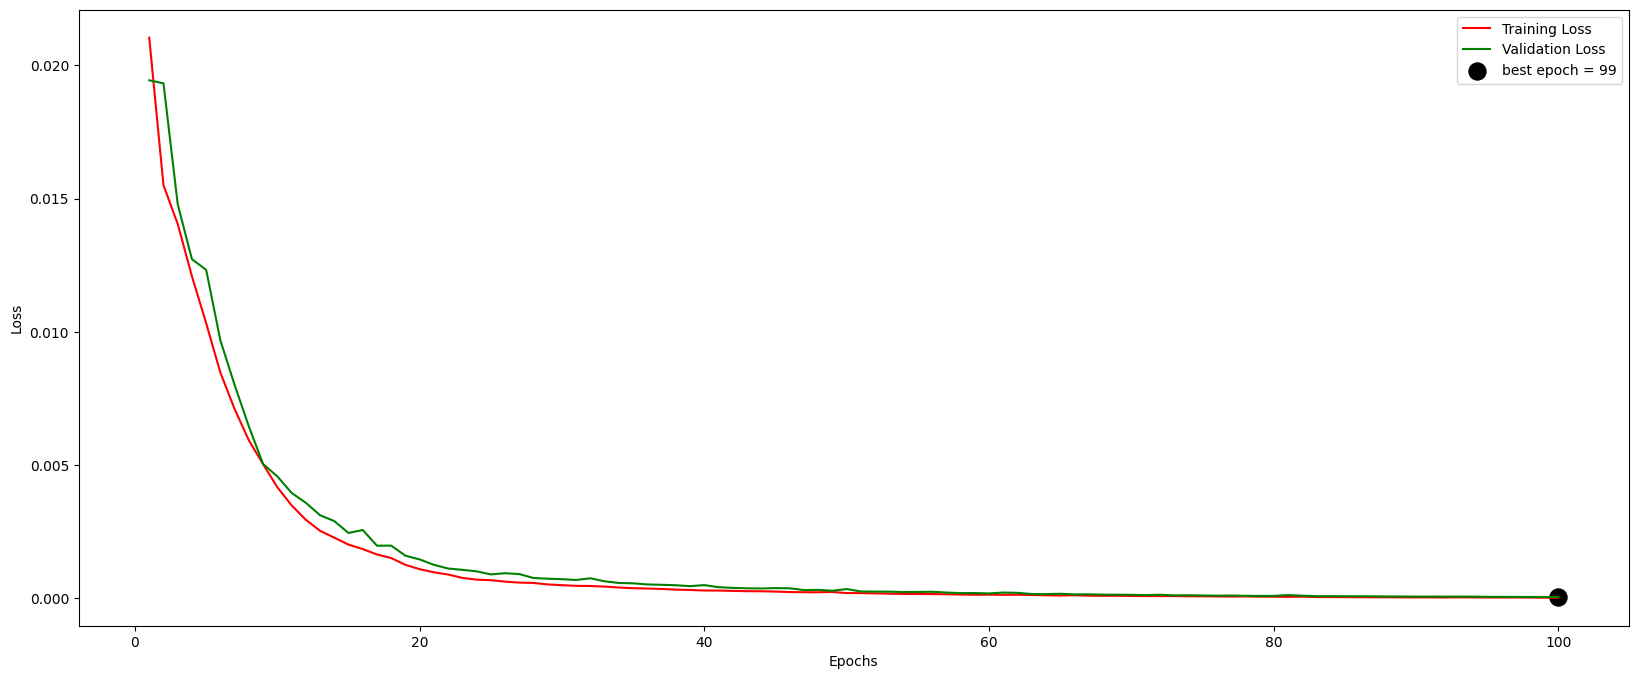

In [18]:
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

Epochs = [i + 1 for i in range(len(tr_loss))]

loss_label = f"best epoch = {index_loss}"

plt.figure(figsize = (20, 8))

plt.plot(Epochs, tr_loss, "r", label = "Training Loss")
plt.plot(Epochs, val_loss, "g", label = "Validation Loss")

plt.scatter(index_loss + 1, val_lowest, c = "black", s = 150, label = loss_label)

plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

### Prediction

In [19]:
y_hatANN = modelANN_regression.predict(x_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


### Error Rate

In [20]:
print(mean_squared_error(y_test, y_hatANN))

2.1257610396170864e-05


### Models Score

In [21]:
print(r2_score(y_test, y_hatANN))

0.9990814409519558


## 2. Linear Regression

### Creating the model

In [23]:
modelRegression_Regression = LinearRegression()

### Training it

In [24]:
modelRegression_Regression.fit(x_train, y_train)

LinearRegression()

### Prediction

In [25]:
y_hatRegression = modelRegression_Regression.predict(x_test)

### Model's Score

In [28]:
print(r2_score(y_test, y_hatRegression))

0.9999999808685334
